In [1]:
%pylab inline
import jax
import jax.numpy as jnp
import jax_cosmo as jc
import h5py
import pandas
from sbi_lens.simulator.redshift import subdivide

Populating the interactive namespace from numpy and matplotlib


In [2]:
nz = jc.redshift.smail_nz(2,  0.68,  0.11, gals_per_arcmin2=27)
nbins=5
nz_bins = subdivide(nz, nbins=nbins)
   

/linkhome/rech/genmfd01/ulm75uc/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:870: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.172325e-07
  warnings.warn(
/linkhome/rech/genmfd01/ulm75uc/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:870: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.192093e-07
  warnings.warn(
/linkhome/rech/genmfd01/ulm75uc/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:870: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.490116e-08
  warnings.warn(
/linkhome/rech/genmfd01/ulm75uc/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:870: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.980232e-08
  warnings.warn(
/linkhome/rech/genmfd01/ulm75uc/.local/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:870: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.960464e-08
  warnings.warn(
/linkhome/rech/genmfd01/ulm75uc/.local/l

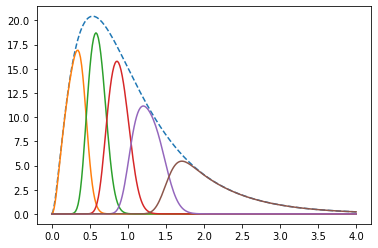

In [3]:
z = jnp.linspace(0,4,256)
plot(z, nz(z)*nz.gals_per_arcmin2, '--')
for b in nz_bins:
  plot(z, b(z)*b.gals_per_arcmin2)

In [4]:
header = 'z_left p([z_left, z_right])'

In [5]:
for i in range(nbins):
    row_list = stack(stack([z,nz_bins[i](z)*nz_bins[i].gals_per_arcmin2],axis=1))
    np.savetxt('Data/redshift_distributions/shear_photoz_new_%d.tab'%i,  row_list,  header=header, delimiter='\t')
    